In [6]:
#dicky fuller test for autocorrelation. First import packages

import pandas as pd
import numpy as np

In [7]:
#create function that will calculate augmented dicky fuller statistics to determine autocorrelation

def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    df_test=adfuller(timeseries,autolag='AIC')
    df_output=pd.Series(df_test[0:4],
                       index=['Test Statistic','p-value','Lags Used','Number of Observations'])
    
    print(df_output)

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [10]:
'''following data set was pulled from Kaggle. Suicide rates amount young males in the US over the past 30 years
hypothesis being there is likely autocorrelation between yearly suicide rate as population increases over time and of the
copy cat effect. Original data set contains multiple countries and so we clean the data below
'''


ss=pd.read_csv('master.csv')

In [11]:
ss.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [12]:

#filter for the US
us=ss[ss['country']=='United States']

In [13]:
us.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [14]:
#create a young us males data frame

young_us_males =us[(us['sex']=='male') & (us['age']=='15-24 years')]

In [17]:
#create a data frame of just years and suicide numbers
final_df =young_us_males[['year','suicides_no']]

In [18]:
final_df.head()

,year,suicides_no
26852,1985,4267
26864,1986,4276
26876,1987,4109
26888,1988,4143
26900,1989,4106


In [20]:
final_df=final_df.reset_index().set_index('year')

In [28]:
final_df=final_df.drop('index',axis=1)

In [29]:
final_df.head()

,suicides_no
year,
1985,4267
1986,4276
1987,4109
1988,4143
1989,4106


In [34]:
time_series=pd.Series(final_df['suicides_no'].values)

In [36]:
#run the augmented dicky fuller test

stationarity_test(time_series)

Test Statistic            -1.310411
p-value                    0.624396
Lags Used                  1.000000
Number of Observations    29.000000
dtype: float64


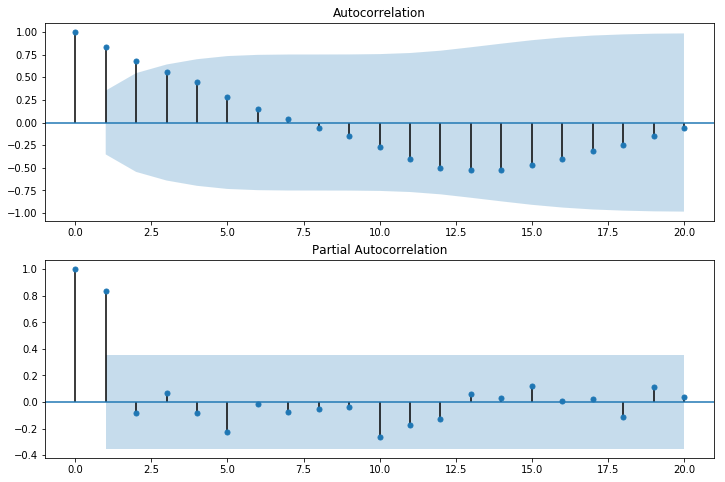

In [37]:
#graph the results below

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

%matplotlib inline

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(time_series,lags=20,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(time_series,lags=20,ax=ax2)

In [ ]:
'''We can see from the p value and graphs that we are 95% certain

there is no autocorrelation in suicide rates amongst young males in the US


'''